# 🏙️ NYC Airbnb Analysis

Exploratory Data Analysis (EDA) of Airbnb listings in New York City.  
The goal is to uncover trends in pricing, availability, and location patterns across boroughs and property types.

**Dataset:** [New York City Airbnb Open Data (Kaggle)](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data)  
**Objective:**  
- Understand the distribution of listings across neighborhoods and property types  
- Analyze pricing trends and availability  
- Identify factors that may influence rental prices and occupancy

This project follows the **standard EDA structure** starting from data loading and cleaning, then moving to feature exploration and visualization.

## 1. Import & Setup

In this section, we import the core Python libraries used for data analysis and visualization.  
We’ll also set global display and plotting options to make outputs cleaner throughout the notebook.  
The main tools are **pandas**, **numpy**, **matplotlib**, and **seaborn**  these will handle data manipulation and visual exploration.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10

## 2. Data Overview

Here we load the Airbnb NYC dataset and inspect its structure.  
The goal is to understand what columns exist, what data types they use, and whether there are missing or inconsistent values.  
We’ll check:
- Dataset shape (rows and columns)
- Data types
- Missing values
- Basic statistics and unique categorical values

In [3]:
#2.0 Loading and converting data to paraquet
df = pd.read_csv("../data/AB_NYC_2019.csv")

parquet_path = "../data/AB_NYC_2019.parquet"
df.to_parquet(parquet_path, index=False)
print("Parquet file saved to", parquet_path)

data = pd.read_parquet("../data/AB_NYC_2019.parquet")
data.head(10)

Parquet file saved to ../data/AB_NYC_2019.parquet


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,None,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [4]:
#2.1 Data Overview
print("Shape:", data.shape)
print("\nInfo:")
print(data.info())

print("\nMissing Values:")
print(data.isna().sum())

print("\nSummary Statistics:")
display(data.describe(include='all'))

Shape: (48895, 16)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_r

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


### 2.1 Overview Summary

The dataset contains **48,895 Airbnb listings** across **five New York City boroughs**, with **16 columns** describing each listing’s attributes such as location, price, host information, and availability.

**Key points:**
- No major structural issues — all columns loaded correctly.
- Minor missing values in `name` (16) and `host_name` (21) can be safely ignored or dropped.
- Columns `last_review` and `reviews_per_month` have ~20% missing values, likely for listings that have never been reviewed.
- Numeric columns like `price` and `minimum_nights` show extreme outliers (up to \$10,000 and 1,250 nights), which may need capping or filtering later.
- Most listings are in **Manhattan**, and **Entire home/apt** is the most common room type.
- Coordinates (`latitude`, `longitude`) indicate all entries fall within NYC boundaries.

This initial inspection suggests the dataset is clean enough for analysis after handling a few missing values and outliers.

In [5]:
# 2.2 Column Names & Structure
print("Column Names:")
print(list(data.columns))

print("\nChecking for spaces or inconsistencies:")
issues = False
for col in data.columns:
    if " " in col:
        print(f"⚠️ Column '{col}' contains a space!")
        issues = True

if not issues:
    print("✔ All column names are clean and consistent.")

Column Names:
['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

Checking for spaces or inconsistencies:
✔ All column names are clean and consistent.


### 2.2 Column Names & Structure
All column names follow consistent snake_case formatting. No spacing or naming inconsistencies found.

## 3. Cleaning & Fixes

In [6]:
# 3.1 Cleaning & Fixes

# 1. Fill text-based missing values
data['name'] = data['name'].fillna("Unknown")
data['host_name'] = data['host_name'].fillna("Unknown")

# 2. Handle review-related missing values
# Listings with no reviews: reviews_per_month = 0, last_review = NaT
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

# Convert last_review to datetime; missing will become NaT
data['last_review'] = pd.to_datetime(data['last_review'], errors='coerce')

# 3. Confirm fix
data.info()
print("\nMissing values after cleaning:")
print(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48895 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48895 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

## 4. Feature Engineering

### 4.1 review_recency
Number of days since the last review. Listings with no reviews receive 0.

In [7]:
# Calculate days since last review
reference_date = data['last_review'].max().date()
data['review_recency'] = (pd.Timestamp(reference_date) - data['last_review']).dt.days

# For listings with no reviews, recency should be 0
# Fill missing with 0, then convert to Int64 (nullable integer)
data['review_recency'] = data['review_recency'].fillna(0).astype("Int64")

# Quick check
data[['last_review', 'review_recency']].head()

,last_review,review_recency
0,2018-10-19,262
1,2019-05-21,48
2,NaT,0
3,2019-07-05,3
4,2018-11-19,231


### 4.2 is_super_active_host
Binary flag identifying hosts with 5 or more active listings. Helps compare professional hosts vs casual hosts.

In [8]:
data['is_super_active_host'] = (data['calculated_host_listings_count'] >= 5).astype(int)

# Check first rows
data[['calculated_host_listings_count', 'is_super_active_host']].head()

,calculated_host_listings_count,is_super_active_host
0,6,1
1,2,0
2,1,0
3,1,0
4,1,0


### Summary of Feature Engineering

Two new columns were created to improve analysis.  
`review_recency` measures how many days have passed since the last review.  
Listings with no reviews get a value of 0.  

`is_super_active_host` flags hosts that manage 5 or more listings.  
This helps identify commercial operators compared to single–property hosts.


## 5. Univariate Analysis

### 5.1 Price Distribution

Shows the spread of listing prices.  
The market contains many extreme outliers, so the plot focuses on prices below 500 USD to reveal the true distribution.

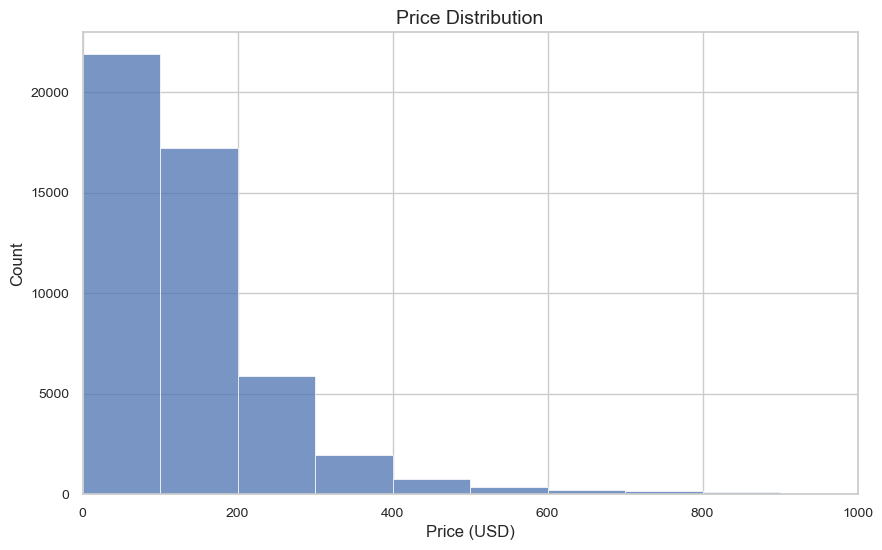

In [9]:
plt.figure()
sns.histplot(data['price'], bins=100, kde=False)
plt.title("Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("Count")
plt.xlim(0, 1000)  # Keep only realistic value
plt.show()

### 5.2 Room Type Distribution

Displays the count of listings by room type.  
Helps identify whether entire homes, private rooms, or shared rooms dominate the market.

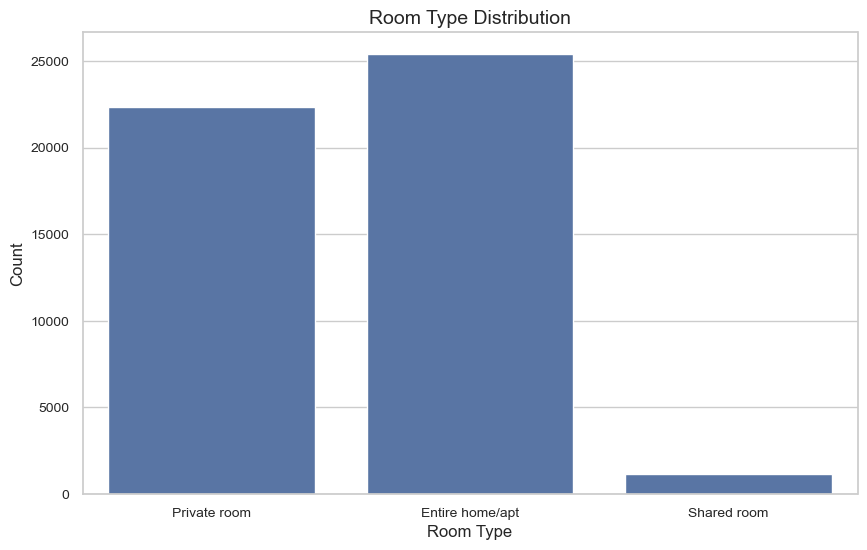

In [10]:
plt.figure()
sns.countplot(data=data, x="room_type")
plt.title("Room Type Distribution")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.show()

### 5.3 Neighbourhood Group Distribution

Shows how listings are distributed across NYC boroughs.  
Useful for understanding which areas have the highest supply.

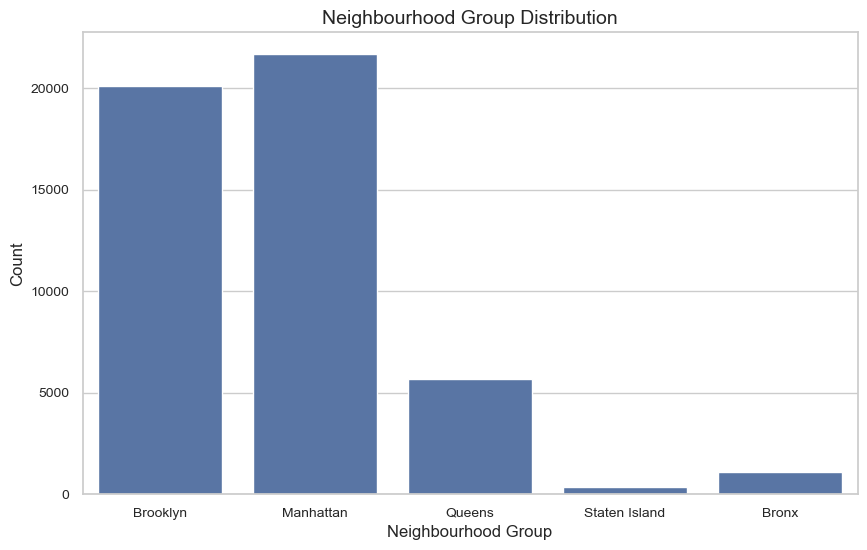

In [11]:
plt.figure()
sns.countplot(data=data, x="neighbourhood_group")
plt.title("Neighbourhood Group Distribution")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Count")
plt.show()

### 5.4 Minimum Nights Distribution

Illustrates host rules on minimum stay length.  
The plot focuses on values below 30 nights to avoid distortion from extreme values.

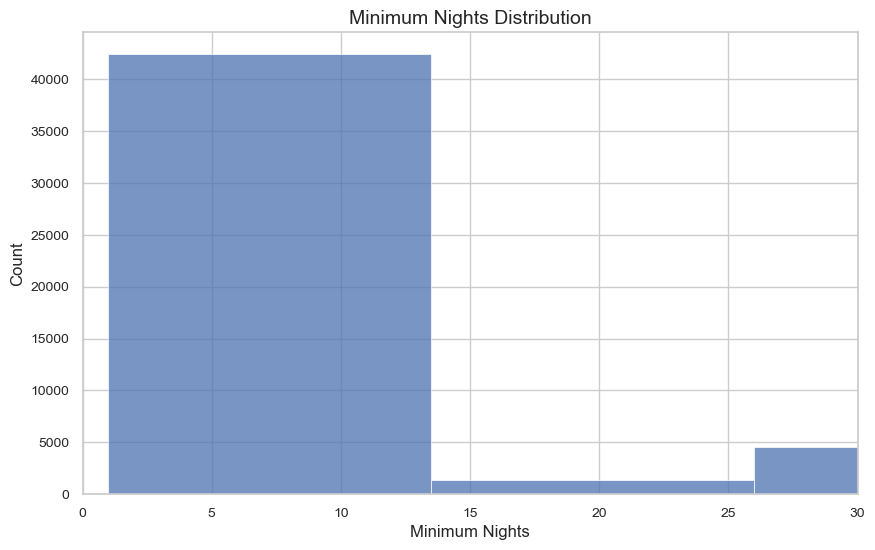

In [12]:
plt.figure()
sns.histplot(data["minimum_nights"], bins=100)
plt.title("Minimum Nights Distribution")
plt.xlabel("Minimum Nights")
plt.ylabel("Count")
plt.xlim(0, 30)
plt.show()

### 5.5 Availability (365 Days)

Shows how often listings are available throughout the year.  
Helps identify patterns such as seasonal rentals or always-available hosts.

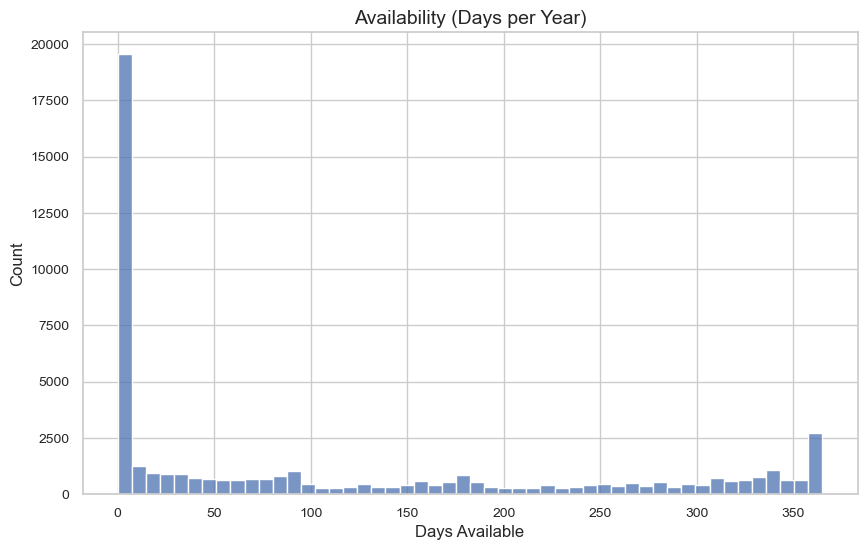

In [13]:
plt.figure()
sns.histplot(data["availability_365"], bins=50)
plt.title("Availability (Days per Year)")
plt.xlabel("Days Available")
plt.ylabel("Count")
plt.show()

### Summary of Univariate Findings

Prices vary widely, but most listings fall below 500 USD.  
Entire homes and private rooms dominate the platform while shared rooms remain rare.  
Manhattan and Brooklyn contain the majority of listings.  
Most hosts allow short stays, and availability patterns show a mix of seasonal and full–year listings.

## 6. Bivariate Analysis

### 6.1 Price vs Neighbourhood Group

Shows how listing prices vary across NYC boroughs.  
Boxplots reveal both the median price and the spread of outliers.

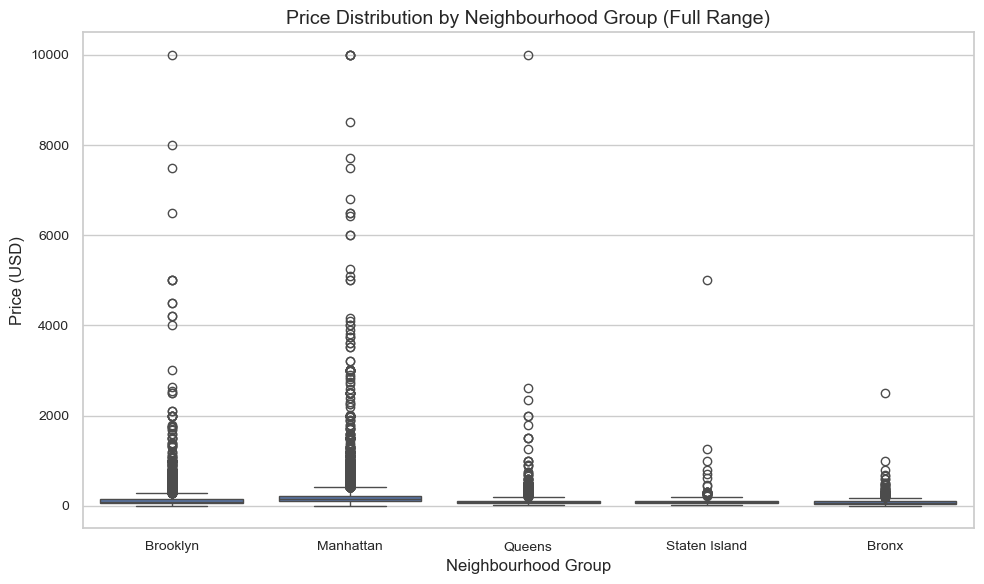

In [14]:
# 6.1(a) Price Distribution by Neighbourhood Group (Full)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="neighbourhood_group", y="price")
plt.title("Price Distribution by Neighbourhood Group (Full Range)")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price (USD)")
plt.tight_layout()


plt.savefig("../figures/price_distribution_full.png")
plt.show()

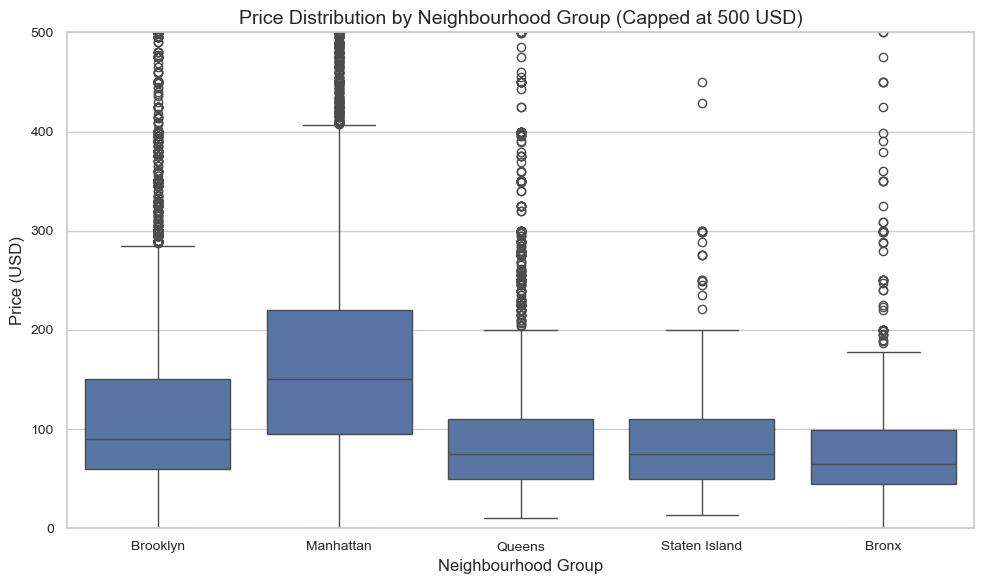

In [15]:
# 6.1(b) Price Distribution by Neighbourhood Group (Capped)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="neighbourhood_group", y="price")
plt.title("Price Distribution by Neighbourhood Group (Capped at 500 USD)")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price (USD)")
plt.ylim(0, 500)
plt.tight_layout()


plt.savefig("../figures/price_distribution_capped.png")
plt.show()

The first plot shows the full price range, including extreme outliers up to 10,000 USD.

The second plot caps prices at 500 USD to reveal meaningful differences between boroughs.

This approach provides both an honest distribution and a readable visualization.

### 6.1 Interpretation: Price Differences Across Neighbourhood Groups

Manhattan has the highest average prices by a wide margin.
Brooklyn follows as the second most expensive borough.
Queens, the Bronx, and Staten Island have significantly lower prices, showing a clear geographic price gradient within New York City.

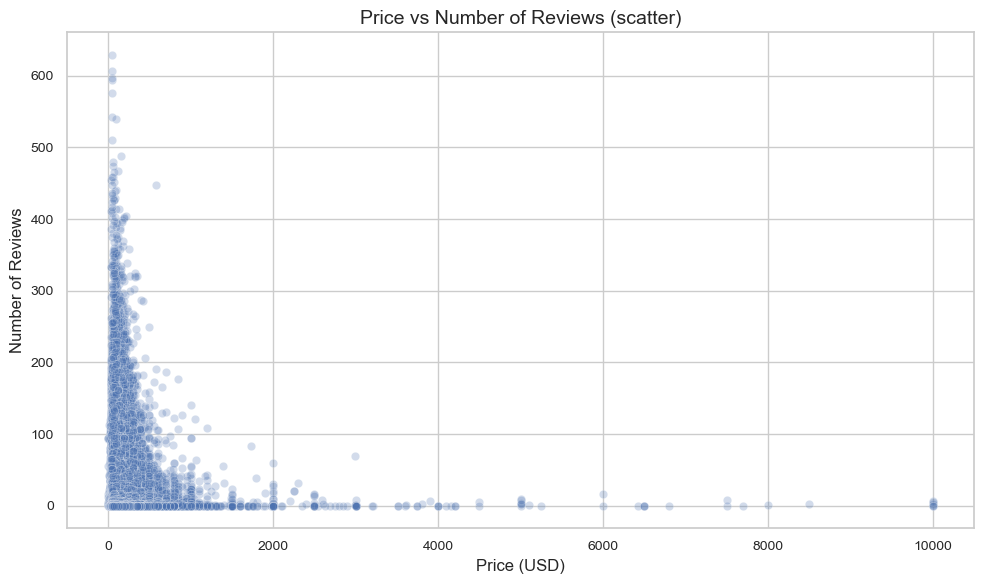

In [16]:
# 6.2 Price vs Number of Reviews - raw scatter
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='price', y='number_of_reviews', alpha=0.25)
plt.title("Price vs Number of Reviews (scatter)")
plt.xlabel("Price (USD)")
plt.ylabel("Number of Reviews")
plt.tight_layout()

plt.savefig("../figures/price_vs_reviews_scatter.png")
plt.show()

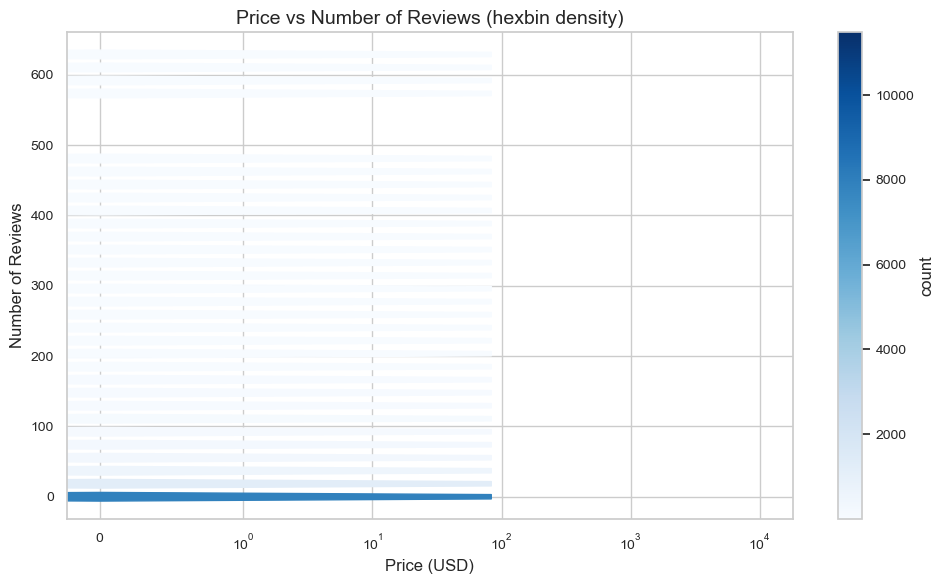

In [17]:
# 6.2b Price vs Number of Reviews - hexbin (density)
plt.figure(figsize=(10, 6))
plt.hexbin(x=data['price'], y=data['number_of_reviews'], gridsize=60, cmap='Blues', mincnt=1)
plt.colorbar(label='count')
plt.title("Price vs Number of Reviews (hexbin density)")
plt.xlabel("Price (USD)")
plt.ylabel("Number of Reviews")
plt.xscale('symlog', linthresh=1)  # optional: show small prices linearly, big prices in log
plt.tight_layout()

plt.savefig("../figures/price_vs_reviews_hexbin.png")
plt.show()

### 6.2 Interpretation: Price vs Number of Reviews

Most high-activity listings are low-priced.
As price increases, listings tend to have fewer reviews.

Hexbin density clarifies the dense cluster of low-priced, high-review listings.

### 6.3 Price vs Room Type

This plot compares prices across different Airbnb room types.

Entire home listings have the highest median prices.
Private rooms sit in a mid-range and attract budget travelers.
Shared rooms are rare and have the lowest prices.

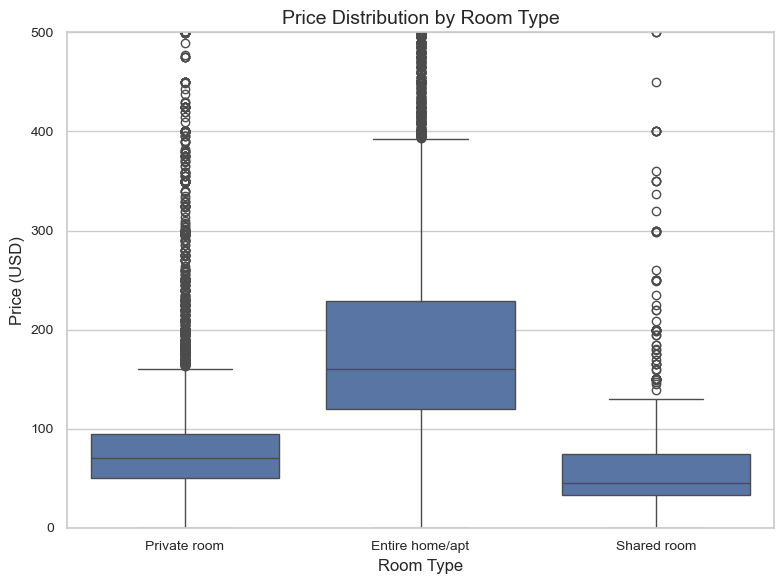

In [18]:
# 6.3 Price vs Room Type
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x='room_type', y='price')
plt.title("Price Distribution by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Price (USD)")
plt.ylim(0, 500)  # optional cap for readability
plt.tight_layout()


plt.savefig("../figures/price_vs_room_type.png")
plt.show()

### 6.3 Interpretation: Price Differences by Room Type

Entire homes command higher prices since guests pay for full privacy.  
Private rooms show a wide spread but stay far below entire homes.  
Shared rooms remain the cheapest option in the NYC market.

### 6.4 Price vs Minimum Nights

This plot checks whether hosts charge more when they impose longer minimum stays.
Most listings require short stays of 1 to 3 nights.
The plot focuses on 0 to 30 nights to avoid extreme outliers.

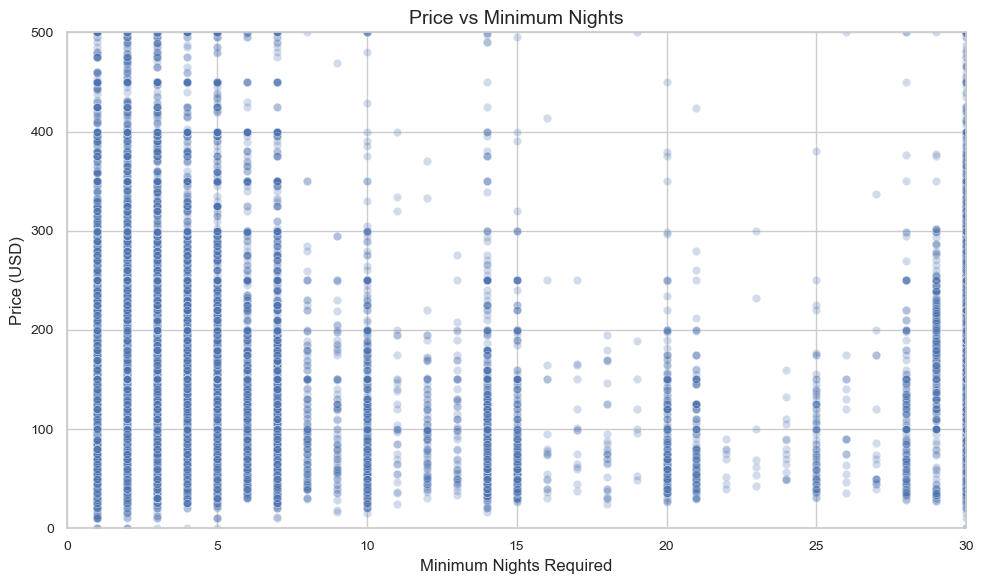

In [19]:
# 6.4 Price vs Minimum Nights
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x='minimum_nights',
    y='price',
    alpha=0.25
)
plt.xlim(0, 30)  # focus on realistic range
plt.ylim(0, 500)  # improve readability
plt.title("Price vs Minimum Nights")
plt.xlabel("Minimum Nights Required")
plt.ylabel("Price (USD)")
plt.tight_layout()

plt.savefig("../figures/price_vs_minimum_nights.png")
plt.show()

### 6.4 Interpretation: Minimum Nights and Price

Higher minimum nights do not guarantee higher prices.  
Most expensive listings still allow short stays.  
Extreme minimum-night values come from a small number of special-case listings.

### 6.5 Availability vs Price

This section checks how yearly availability relates to listing price.  
The plot shows if expensive listings stay booked less or more than cheaper listings.

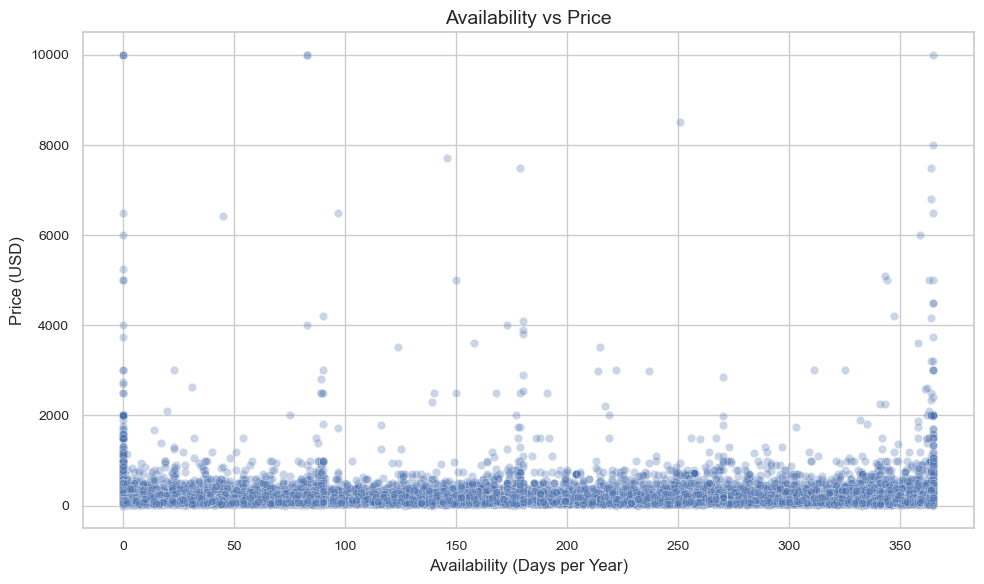

In [20]:
# 6.5 Availability vs Price

sns.scatterplot(
    data=data,
    x='availability_365',
    y='price',
    alpha=0.3
)
plt.title("Availability vs Price")
plt.xlabel("Availability (Days per Year)")
plt.ylabel("Price (USD)")
plt.tight_layout()

plt.savefig("../figures/availability_vs_price.png")
plt.show()

### 6.5 Interpretation: Availability vs Price

Most high-price listings stay unavailable for most of the year.  
Cheaper listings stay available for many days.  
Premium listings attract fewer booking days because they cost more.

### 6.6 Host Listing Count vs Number of Reviews

This plot shows how many reviews hosts get based on the number of listings they manage.  
Large hosts tend to behave differently from single-listing hosts.

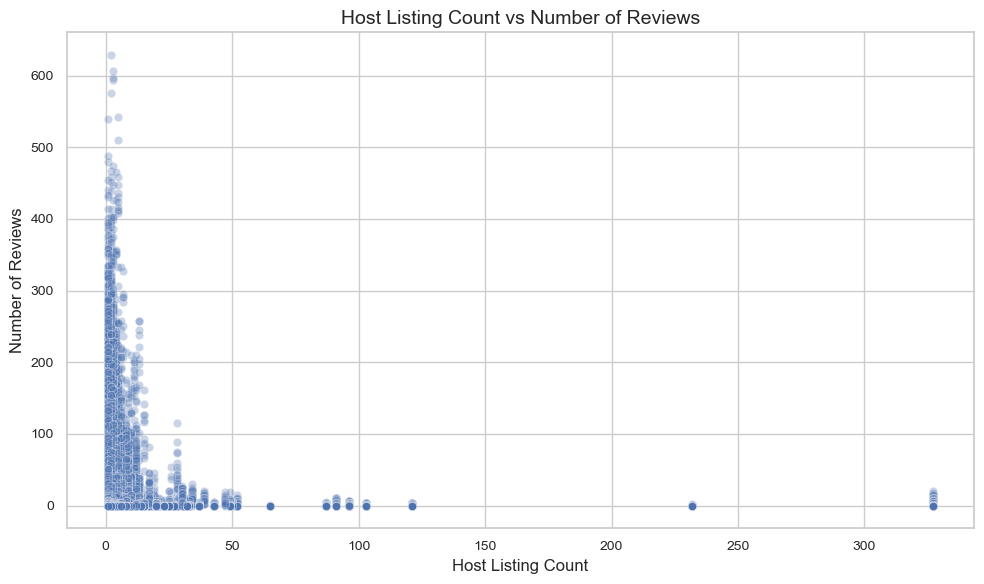

In [22]:
sns.scatterplot(
    data=data,
    x='calculated_host_listings_count',
    y='number_of_reviews',
    alpha=0.3
)
plt.title("Host Listing Count vs Number of Reviews")
plt.xlabel("Host Listing Count")
plt.ylabel("Number of Reviews")
plt.tight_layout()


plt.savefig("../figures/host_listings_vs_reviews.png")
plt.show()

### 6.6 Interpretation

Single-listing hosts receive most guest reviews.  
Hosts with many listings show lower review counts per listing.  
The pattern suggests smaller hosts engage more actively with guests.

### 6.7 Availability vs Price

Next, we will examine the relationship between a listing's availability throughout the year (`availability_365`) and its price. This visualization aims to reveal whether listings that are available for most of the year—likely commercial or dedicated rentals—are priced differently than those with limited availability.

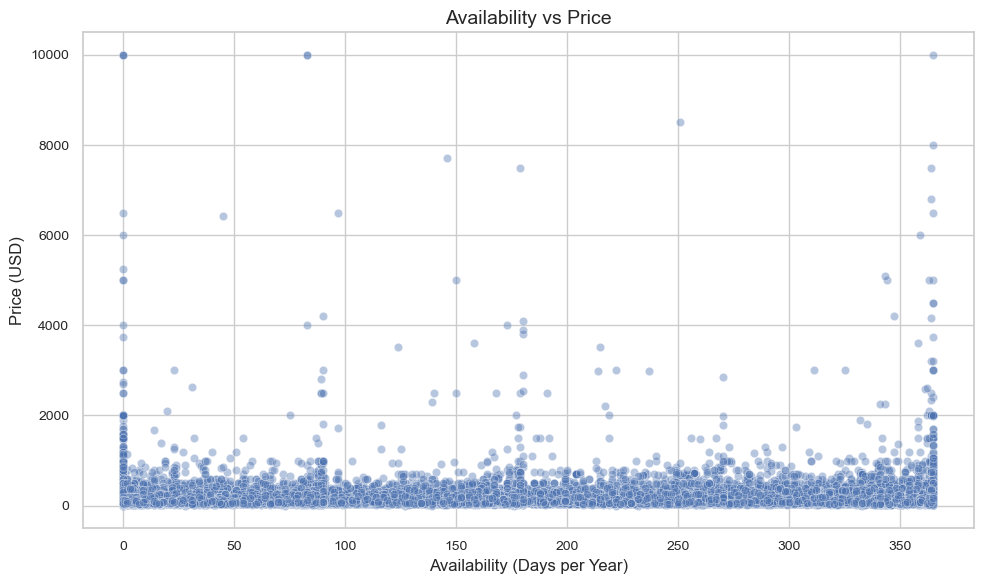

In [23]:
# 6.7 Availability vs Price

sns.scatterplot(
    data=data,
    x='availability_365',
    y='price',
    alpha=0.4
)

plt.title("Availability vs Price")
plt.xlabel("Availability (Days per Year)")
plt.ylabel("Price (USD)")
plt.tight_layout()

plt.savefig("../figures/availability_vs_price.png")
plt.show()

### 6.7 Interpretation

* **No Simple Linear Trend:** The scatter plot does not show a strong, single linear correlation where price simply goes up or down as availability increases.
* **Clusters at Extremes:** There are noticeable clusters of listings at both very low availability (0-60 days) and full-year availability (365 days).
* **Price Range across Availability:** Listings that are available year-round (`availability_365` > 300) exhibit a wide range of prices, indicating that "commercial" hosts operate across all market segments, from budget to luxury.
* **High-End Outliers:** Some of the highest-priced listings appear across various availability levels, suggesting that luxury status is not strictly tied to how often a property is available.

## 7. Summary & Conclusions